In [ ]:
import pandas as pd
import plotly.express as px



In [ ]:
path = "../data"


json_path = "../data/_annotations.coco.json"


'/home/marwa/Detection_Img/prepare_data'

In [31]:
from pathlib import Path

if not Path(path).exists():
    print(f"Le dossier n'existe pas : {path}")
else:
    print(f"Dossier trouvé : {path}")
    print("Contenu :", list(Path(path).iterdir()))


Dossier trouvé : ../data
Contenu : [PosixPath('../data/cl6odm3oj0023ao55641s046f_4_FALSE_COLOR__URBAN_jpg.rf.e06b1ddebe1889e272bf11bcd8220072.jpg'), PosixPath('../data/cl6azt6by0000go55h4io4tab_6_SWIR_jpg.rf.f8a793559d8103b9c237ca96944514b5.jpg'), PosixPath('../data/cl6e2xkh0002mgk55aif2aqvo_2_FALSE_COLOR_jpg.rf.0b7ee80fe8e0318db34d8f46d4d9e818.jpg'), PosixPath('../data/cl6opc9oz006zao552eyx63jq_6_SWIR_jpg.rf.76de8b1ec7f1aeb69a59748d8a8c9207.jpg'), PosixPath('../data/cl6lt6ipg00288w55ee7scu7b_6_SWIR_jpg.rf.217d62e8998857f4cc5ca3a6ad7e5412.jpg'), PosixPath('../data/cl6b5x63r005il4551chxdt93_2_FALSE_COLOR_jpg.rf.8c4fb06b6812031edb1ad781ec14d2b9.jpg'), PosixPath('../data/cl6kgnh9k0030c455dtnabosj_4_FALSE_COLOR__URBAN_jpg.rf.9bf22dbcfc66e6fb99e981e0bf995458.jpg'), PosixPath('../data/cl6chqhwl00cll4558hnj0glz_6_SWIR_jpg.rf.1056e04894280f6c5f84af1ce3f49ad9.jpg'), PosixPath('../data/cl6cse9tv00fbl4552j5aepjj_2_FALSE_COLOR_jpg.rf.858fc862940a80171ba1698d549acec2.jpg'), PosixPath('../data/cl6b5

Nombre d'images trouvées : 500
[PosixPath('../data/cl6odm3oj0023ao55641s046f_4_FALSE_COLOR__URBAN_jpg.rf.e06b1ddebe1889e272bf11bcd8220072.jpg'), PosixPath('../data/cl6azt6by0000go55h4io4tab_6_SWIR_jpg.rf.f8a793559d8103b9c237ca96944514b5.jpg'), PosixPath('../data/cl6e2xkh0002mgk55aif2aqvo_2_FALSE_COLOR_jpg.rf.0b7ee80fe8e0318db34d8f46d4d9e818.jpg'), PosixPath('../data/cl6opc9oz006zao552eyx63jq_6_SWIR_jpg.rf.76de8b1ec7f1aeb69a59748d8a8c9207.jpg'), PosixPath('../data/cl6lt6ipg00288w55ee7scu7b_6_SWIR_jpg.rf.217d62e8998857f4cc5ca3a6ad7e5412.jpg')]


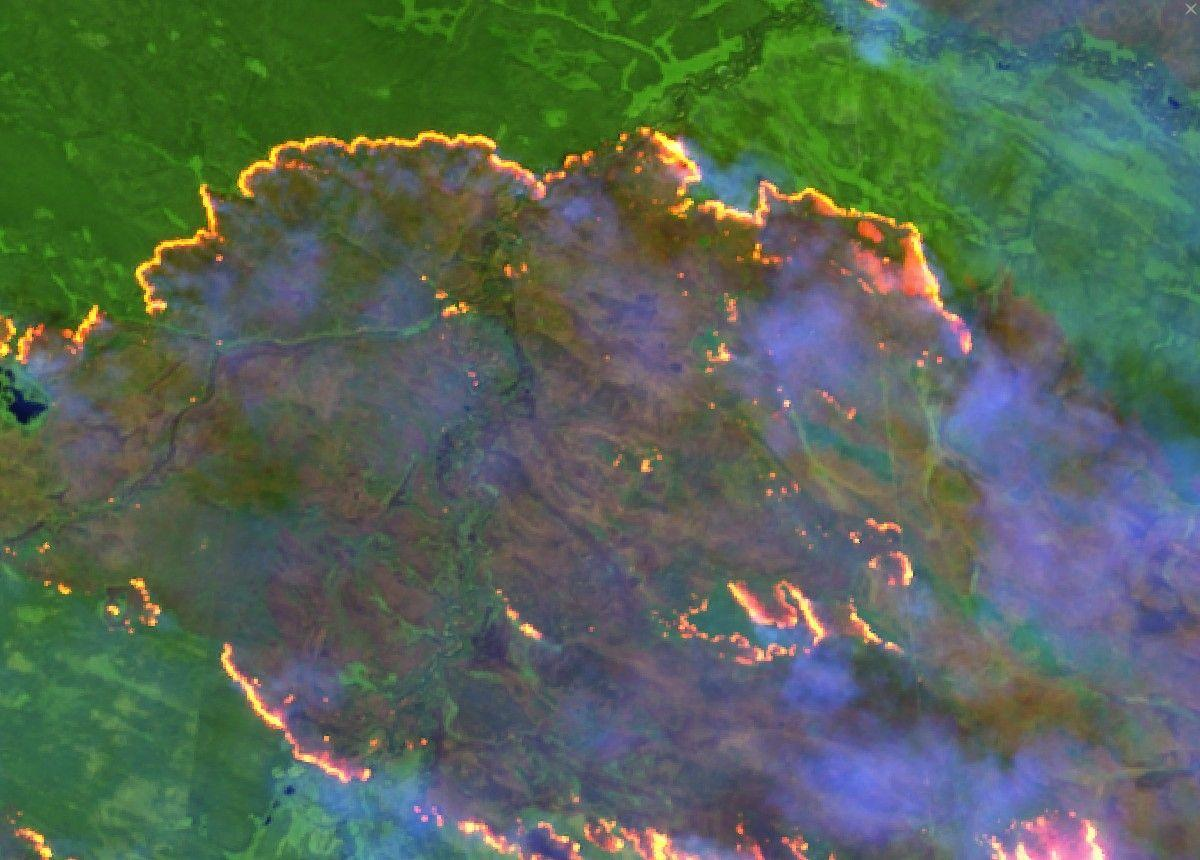

In [24]:
from pathlib import Path
from PIL import Image


data_folder = Path("../data")

image_paths = list(data_folder.glob("*.jpg"))
print(f"Nombre d'images trouvées : {len(image_paths)}")
print(image_paths[:5]) 

if image_paths:
    img = Image.open(image_paths[0])
    img.show()
    


In [ ]:
import os
from PIL import Image


image_folder = "../data"


extensions = (".jpg", ".jpeg", ".png")


fichiers_corrompus = []
infos_images = []

for filename in os.listdir(image_folder):
    if filename.lower().endswith(extensions):
        filepath = os.path.join(image_folder, filename)
        try:
            with Image.open(filepath) as img:
                img.verify()  # Vérifie que l'image n'est pas corrompue
                infos_images.append({
                    "nom": filename,
                    "format": img.format,
                    "taille": img.size,
                    "mode": img.mode
                })
        except Exception as e:
            fichiers_corrompus.append((filename, str(e)))

# Résultats
print(f"Nombre total d'images valides : {len(infos_images)}")
print(f"Nombre d'images corrompues : {len(fichiers_corrompus)}")

if fichiers_corrompus:
    print("Liste des fichiers corrompus ou problématiques :")
    for f, erreur in fichiers_corrompus:
        print(f"- {f} : {erreur}")

# Optionnel : afficher les premières images valides
if infos_images:
    print("\nExemple d'informations sur la première image valide :")
    print(infos_images[0])


Nombre total d'images valides : 500
Nombre d'images corrompues : 0

Exemple d'informations sur la première image valide :
{'nom': 'cl6odm3oj0023ao55641s046f_4_FALSE_COLOR__URBAN_jpg.rf.e06b1ddebe1889e272bf11bcd8220072.jpg', 'format': 'JPEG', 'taille': (1200, 860), 'mode': 'RGB'}


In [35]:
from pathlib import Path
import pandas as pd
import json
from collections import Counter


def get_file_extensions(folder_path: str) -> Counter:
    """
    Récupère les extensions des fichiers présents dans un dossier.

    Args:
        folder_path (str): Chemin du dossier à analyser.

    Returns:
        Counter: Un compteur des extensions de fichiers trouvées (en minuscules).
                 Exemple : Counter({'.jpg': 10, '.png': 5})
    """
    folder = Path(folder_path)
    extensions = [file.suffix.lower() for file in folder.iterdir() if file.is_file()]
    return Counter(extensions)


def load_coco_json(json_path: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Charge un fichier JSON au format COCO et renvoie les DataFrames des images et annotations.

    Args:
        json_path (str): Chemin du fichier JSON à charger.

    Raises:
        FileNotFoundError: Si le fichier n'existe pas.

    Returns:
        tuple[pd.DataFrame, pd.DataFrame]: 
            - DataFrame contenant les métadonnées des images.
            - DataFrame contenant les annotations associées.
    """
    if not Path(json_path).is_file():
        raise FileNotFoundError(f"Le fichier JSON n'existe pas : {json_path}")
    with open(json_path, "r", encoding="utf-8") as f:
        coco_dict = json.load(f)

    images_df = pd.DataFrame(coco_dict["images"])
    annotations_df = pd.DataFrame(coco_dict["annotations"])
    return images_df, annotations_df


def check_image(images_folder: str, images_df: pd.DataFrame) -> tuple[set, set]:
    """
    Vérifie la cohérence entre les images présentes dans un dossier et celles listées dans un JSON COCO.

    Args:
        images_folder (str): Chemin vers le dossier contenant les images.
        images_df (pd.DataFrame): DataFrame contenant les noms de fichiers images (colonne "file_name").

    Returns:
        tuple[set, set]: 
            - Ensemble des fichiers présents dans le JSON mais absents du dossier.
            - Ensemble des fichiers présents dans le dossier mais absents du JSON.
    """
    valid_exts = {".jpg", ".jpeg", ".png"}
    folder_files = {p.name for p in Path(images_folder).glob("*.*") if p.suffix.lower() in valid_exts}
    json_files = set(images_df["file_name"].tolist())

    missing_in_folder = json_files - folder_files
    missing_in_json = folder_files - json_files
    return missing_in_folder, missing_in_json


if __name__ == "__main__":
    path = "../data"
    print("Extensions trouvées :", get_file_extensions(path))

    json_path = "../data/_annotations.coco.json"
    images_df, annotations_df = load_coco_json(json_path)

    missing_in_folder, missing_in_json = check_image(path, images_df)
    print("Fichiers listés dans le JSON mais absents du dossier :", missing_in_folder)
    print("Fichiers présents dans le dossier mais absents du JSON :", missing_in_json)


Extensions trouvées : Counter({'.jpg': 500, '.json': 1})
Fichiers listés dans le JSON mais absents du dossier : set()
Fichiers présents dans le dossier mais absents du JSON : set()


In [37]:
# 4️⃣ Test : chargement du JSON
images_df, annotations_df = load_coco_json(json_path)

print("Aperçu des images :")
display(images_df.head())

print("Aperçu des annotations :")
display(annotations_df.head())



Aperçu des images :


id  license                                          file_name  height  \
0   0        1  cl6e1qges001kgk555z158f33_2_FALSE_COLOR_jpg.rf...     860   
1   1        1  cl6kgm9qr002yc455g5qs87kz_2_FALSE_COLOR_jpg.rf...     860   
2   2        1  cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf....     860   
3   3        1  cl6b6pieh007rl455fwvb73gr_1_TRUE_COLOR_jpg.rf....     860   
4   4        1  cl6b5k38g003zl455bgtd1317_4_FALSE_COLOR__URBAN...     860   

   width              date_captured  \
0   1200  2025-09-14T12:06:19+00:00   
1   1200  2025-09-14T12:06:19+00:00   
2   1200  2025-09-14T12:06:19+00:00   
3   1200  2025-09-14T12:06:19+00:00   
4   1200  2025-09-14T12:06:19+00:00   

                                               extra  
0  {'name': 'cl6e1qges001kgk555z158f33_2_FALSE_CO...  
1  {'name': 'cl6kgm9qr002yc455g5qs87kz_2_FALSE_CO...  
2  {'name': 'cl6odzs5e002oao55heuig0a6_1_TRUE_COL...  
3  {'name': 'cl6b6pieh007rl455fwvb73gr_1_TRUE_COL...  
4  {'name': 'cl6b5k38g003zl455bgtd1317_4_FALSE_CO...

Aperçu des annotations :


id  image_id  category_id                        bbox        area  \
0   0         1            1  [277, 207, 568.95, 591.79]  336698.921   
1   1         2            1    [800, 0, 157.45, 413.38]   65086.681   
2   2         2            1    [1062, 96, 58.37, 63.91]    3730.427   
3   3         2            1   [452, 442, 410.09, 350.6]  143777.554   
4   4         2            1    [0, 163, 336.16, 375.08]  126086.893   

  segmentation  iscrowd  
0           []        0  
1           []        0  
2           []        0  
3           []        0  
4           []        0

In [43]:
from data_cleaner import get_file_extensions, load_coco_json, check_image


data_path = "./data"
json_path = "./data/_annotations.coco.json"

missing_in_folder, missing_in_json = check_image(data_path, images_df)

print("Fichiers listés dans le JSON mais absents du dossier :", missing_in_folder)
print("Fichiers présents dans le dossier mais absents du JSON :", missing_in_json)


Fichiers listés dans le JSON mais absents du dossier : {'cl6oqcc63008vao551jrk90jb_1_TRUE_COLOR_jpg.rf.c494c328e46443df2ef5374b08815af3.jpg', 'cl6b64hpf0066l4555lt3czhh_4_FALSE_COLOR__URBAN_jpg.rf.9708ab4cc3223e0de7d63bbe1f526b8b.jpg', 'cl6dyeg510004hg554xxs8aux_6_SWIR_jpg.rf.375714af6c9f8fa9fb5423c7dbcea6cc.jpg', 'cl6b75qhp0098l455giwk7bva_1_TRUE_COLOR_jpg.rf.a94ba5968034dec9b73c7dbe480dc089.jpg', 'cl6e0dbw9000pgk55cv1sgp5x_1_TRUE_COLOR_jpg.rf.049fb46a294a4647ce0018cafe44851a.jpg', 'cl6oplsq0007fao556ul723tq_2_FALSE_COLOR_jpg.rf.94a095f4ae3f57df0997e3450c2bea9d.jpg', 'cl6ct1fab00gnl455b6a585vi_6_SWIR_jpg.rf.14491e2fe3633bf885fcb9c9e4bf3c4d.jpg', 'cl6b5dekg003el4552wy46fsz_4_FALSE_COLOR__URBAN_jpg.rf.025e0455dad67b91979fecdc00bf453c.jpg', 'cl6op4t8q006jao559muv9l5l_2_FALSE_COLOR_jpg.rf.d0eac7b7bc3a29b59a5da91316b541c0.jpg', 'cl6kjc5r500168w55bry741c1_4_FALSE_COLOR__URBAN_jpg.rf.87277927432c3b5a8ad0114a48c02d80.jpg', 'cl6oqat3j008rao556mbqfoan_2_FALSE_COLOR_jpg.rf.0ddc196fcc073c504d510a

In [10]:
import json
import pandas as pd

data_path = "../data"
json_path = "../data/_annotations.coco.json"

with open(json_path, "r") as f:
    coco = json.load(f)

images_df = pd.DataFrame(coco["images"])
annotations_df = pd.DataFrame(coco["annotations"])
categories_df = pd.DataFrame(coco["categories"])


# Première annotation
ann = annotations_df.iloc[0]

print("ID annotation :", ann["id"])
print("ID image :", ann["image_id"])
print("ID catégorie :", ann["category_id"])
print("Bbox :", ann["bbox"])
print("Surface :", ann["area"])
print("Segmentation :", ann["segmentation"])



ID annotation : 0
ID image : 1
ID catégorie : 1
Bbox : [277, 207, 568.95, 591.79]
Surface : 336698.921
Segmentation : []


In [11]:
def detect_bbox_anomalies(df):
    return df[df['bbox'].apply(lambda x: x[2] == 0 or x[3] == 0)]

bad_bboxes = detect_bbox_anomalies(annotations_df)
print(bad_bboxes)


Empty DataFrame
Columns: [id, image_id, category_id, bbox, area, segmentation, iscrowd]
Index: []


In [12]:
bad_bboxes = annotations_df[annotations_df['bbox'].apply(lambda x: x[2] == 0 or x[3] == 0)]
print(bad_bboxes)


Empty DataFrame
Columns: [id, image_id, category_id, bbox, area, segmentation, iscrowd]
Index: []


In [ ]:
from PIL import Image
import webbrowser
import os

image_path = "./data/nom_image.jpg"

if os.path.isfile(image_path):
    img = Image.open(image_path)
    temp_path = "./temp_image.png"
    img.save(temp_path)  # sauvegarde temporaire
    webbrowser.open(temp_path)  # ouvre dans le navigateur


In [ ]:
output_folder = "./check_images"
os.makedirs(output_folder, exist_ok=True)

for img_info in images_df.to_dict(orient="records"):
    image_file = img_info["file_name"]
    src_path = os.path.join("data", image_file)
    if os.path.isfile(src_path):
        dst_path = os.path.join(output_folder, image_file)
        img = Image.open(src_path)
        img.save(dst_path)  # on sauvegarde pour visualisation manuelle
        break
    print(img_info)
    


{'id': 0, 'license': 1, 'file_name': 'cl6e1qges001kgk555z158f33_2_FALSE_COLOR_jpg.rf.479904c9e54c6ba121689341598bf3ed.jpg', 'height': 860, 'width': 1200, 'date_captured': '2025-09-14T12:06:19+00:00', 'extra': {'name': 'cl6e1qges001kgk555z158f33_2_FALSE_COLOR.jpg'}}
{'id': 1, 'license': 1, 'file_name': 'cl6kgm9qr002yc455g5qs87kz_2_FALSE_COLOR_jpg.rf.95debd80b7509cc0a6afe0a7c7ff6cfe.jpg', 'height': 860, 'width': 1200, 'date_captured': '2025-09-14T12:06:19+00:00', 'extra': {'name': 'cl6kgm9qr002yc455g5qs87kz_2_FALSE_COLOR.jpg'}}
{'id': 2, 'license': 1, 'file_name': 'cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf.fc96fcc9ef8466ce18f286d422df48ea.jpg', 'height': 860, 'width': 1200, 'date_captured': '2025-09-14T12:06:19+00:00', 'extra': {'name': 'cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR.jpg'}}
{'id': 3, 'license': 1, 'file_name': 'cl6b6pieh007rl455fwvb73gr_1_TRUE_COLOR_jpg.rf.8f3f9c84272e40682f7f430cdc4ac4c0.jpg', 'height': 860, 'width': 1200, 'date_captured': '2025-09-14T12:06:19+00:00', 'extr

In [66]:
from pathlib import Path
json_path = Path("../data/_annotations.coco.json")
print(json_path.exists())  # True si le fichier existe


True


In [72]:

data_folder = Path("../data") 

json_path = data_folder / "_annotations.coco.json"

print("Dossier images trouvé ?", data_folder.exists()) 
print("JSON trouvé ?", json_path.exists())             

with open(json_path, "r", encoding="utf-8") as f:
    coco = json.load(f)


print("\nExtensions trouvées :", get_file_extensions(data_folder))
missing_in_folder, missing_in_json = check_images_in_folder(images_df, data_folder)


Dossier images trouvé ? True
JSON trouvé ? True

Extensions trouvées : Counter({'.jpg': 500, '.json': 1})


Dossier images trouvé ? True
JSON trouvé ? True
Nombre d'images : 500
Nombre d'annotations : 959
Catégories : ['wildfire', 'fire']

Extensions trouvées : Counter({'.jpg': 500, '.json': 1})
Fichiers listés dans le JSON mais absents du dossier : set()
Fichiers présents dans le dossier mais absents du JSON : set()
Nombre de BBoxes invalides : 44
Valeurs manquantes images : id               0
license          0
file_name        0
height           0
width            0
date_captured    0
extra            0
dtype: int64
Valeurs manquantes annotations : id              0
image_id        0
category_id     0
bbox            0
area            0
segmentation    0
iscrowd         0
dtype: int64
Nombre d'images sans annotations : 7
      id  license                                          file_name  height  \
0      0        1  cl6e1qges001kgk555z158f33_2_FALSE_COLOR_jpg.rf...     860   
96    96        1  cl6kf5xzo000gc4552qc8hhcc_2_FALSE_COLOR_jpg.rf...     860   
118  118        1  cl6e2kygp002e

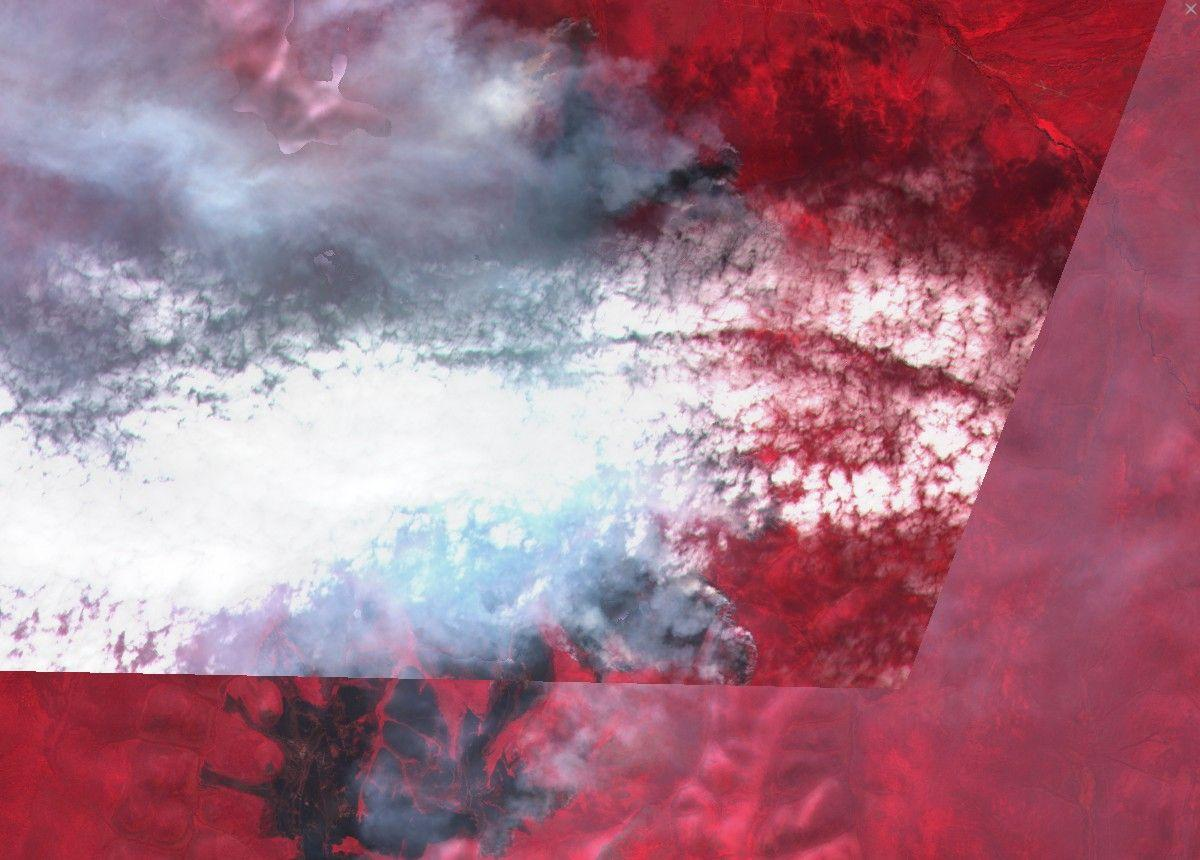

In [70]:
# -*- coding: utf-8 -*-
from pathlib import Path
import pandas as pd
from collections import Counter
import json
from PIL import Image

# --- CHEMINS ---
data_folder = Path("../data")  # Dossier contenant les images et le JSON
json_path = data_folder / "_annotations.coco.json"

print("Dossier images trouvé ?", data_folder.exists())  # doit renvoyer True
print("JSON trouvé ?", json_path.exists())             # doit renvoyer True

# --- CHARGER LE JSON ---
with open(json_path, "r", encoding="utf-8") as f:
    coco = json.load(f)

images_df = pd.DataFrame(coco["images"])
annotations_df = pd.DataFrame(coco["annotations"])

# --- EXPLORATION DE BASE ---
print("Nombre d'images :", len(images_df))
print("Nombre d'annotations :", len(annotations_df))
print("Catégories :", pd.DataFrame(coco.get("categories", []))["name"].tolist() if "categories" in coco else [])

# === FONCTIONS UTILES ===
def get_file_extensions(folder_path: Path) -> Counter:
    """Retourne un compteur des extensions de fichiers dans un dossier."""
    return Counter([file.suffix.lower() for file in folder_path.iterdir() if file.is_file()])

def check_images_in_folder(images_df: pd.DataFrame, folder_path: Path) -> tuple[set, set]:
    """Vérifie cohérence entre images présentes dans le dossier et celles listées dans le JSON."""
    valid_exts = {".jpg", ".jpeg", ".png"}
    folder_files = {f.name for f in folder_path.glob("*.*") if f.suffix.lower() in valid_exts}
    json_files = set(images_df["file_name"].tolist())
    missing_in_folder = json_files - folder_files
    missing_in_json = folder_files - json_files
    return missing_in_folder, missing_in_json

def check_bboxes(annotations_df: pd.DataFrame, images_df: pd.DataFrame) -> pd.DataFrame:
    """Détecte BBoxes invalides : hors limites ou largeur/hauteur nulle."""
    merged = annotations_df.merge(images_df, left_on='image_id', right_on='id', suffixes=('_ann', '_img'))
    merged['x_min'] = merged['bbox'].apply(lambda x: x[0])
    merged['y_min'] = merged['bbox'].apply(lambda x: x[1])
    merged['w'] = merged['bbox'].apply(lambda x: x[2])
    merged['h'] = merged['bbox'].apply(lambda x: x[3])
    
    invalid = merged[
        (merged['x_min'] < 0) |
        (merged['y_min'] < 0) |
        (merged['x_min'] + merged['w'] > merged['width']) |
        (merged['y_min'] + merged['h'] > merged['height']) |
        (merged['w'] == 0) |
        (merged['h'] == 0)
    ]
    return invalid

def missing_values(df: pd.DataFrame) -> pd.Series:
    """Compte les valeurs manquantes par colonne."""
    return df.isna().sum()

def filter_images_without_annotations(images_df: pd.DataFrame, annotations_df: pd.DataFrame) -> pd.DataFrame:
    """Retourne les images n'ayant aucune annotation."""
    unique_image_ids = annotations_df['image_id'].unique()
    return images_df[~images_df['id'].isin(unique_image_ids)]

def show_image(image_path: Path):
    """Affiche une image."""
    if not image_path.is_file():
        print(f"Fichier introuvable : {image_path}")
        return
    img = Image.open(image_path)
    img.show()

def annotations_without_image(annotations_df: pd.DataFrame, images_df: pd.DataFrame) -> pd.DataFrame:
    """Retourne les annotations dont l'image n'existe pas."""
    valid_image_ids = images_df['id'].unique()
    return annotations_df[~annotations_df['image_id'].isin(valid_image_ids)]

def detect_bbox_anomalies(annotations_df: pd.DataFrame) -> pd.DataFrame:
    """Détecte BBoxes aberrantes : largeur ou hauteur = 0."""
    def is_abnormal(bbox):
        w, h = bbox[2], bbox[3]
        return w == 0 or h == 0
    return annotations_df[annotations_df['bbox'].apply(is_abnormal)]

# === EXPLORATION ===
print("\nExtensions trouvées :", get_file_extensions(data_folder))

missing_in_folder, missing_in_json = check_images_in_folder(images_df, data_folder)
print("Fichiers listés dans le JSON mais absents du dossier :", missing_in_folder)
print("Fichiers présents dans le dossier mais absents du JSON :", missing_in_json)

invalid_bboxes = check_bboxes(annotations_df, images_df)
print("Nombre de BBoxes invalides :", len(invalid_bboxes))

print("Valeurs manquantes images :", missing_values(images_df))
print("Valeurs manquantes annotations :", missing_values(annotations_df))

images_no_ann = filter_images_without_annotations(images_df, annotations_df)
print("Nombre d'images sans annotations :", len(images_no_ann))
print(images_no_ann.head())

missing_ann = annotations_without_image(annotations_df, images_df)
print("Annotations sans image :", len(missing_ann))

bad_bboxes = detect_bbox_anomalies(annotations_df)
print("BBoxes aberrantes :", len(bad_bboxes))

# --- OPTIONNEL : afficher une image exemple ---
if not images_no_ann.empty:
    example_image_path = data_folder / images_no_ann.iloc[0]["file_name"]
    print("Image prête à être vérifiée :", example_image_path)
    show_image(example_image_path)


In [50]:
from pathlib import Path

# Vérifier le dossier exact
folder = Path("../data")
print("Contenu du dossier :", list(folder.iterdir()))

Contenu du dossier : [PosixPath('../data/cl6odm3oj0023ao55641s046f_4_FALSE_COLOR__URBAN_jpg.rf.e06b1ddebe1889e272bf11bcd8220072.jpg'), PosixPath('../data/cl6azt6by0000go55h4io4tab_6_SWIR_jpg.rf.f8a793559d8103b9c237ca96944514b5.jpg'), PosixPath('../data/cl6e2xkh0002mgk55aif2aqvo_2_FALSE_COLOR_jpg.rf.0b7ee80fe8e0318db34d8f46d4d9e818.jpg'), PosixPath('../data/cl6opc9oz006zao552eyx63jq_6_SWIR_jpg.rf.76de8b1ec7f1aeb69a59748d8a8c9207.jpg'), PosixPath('../data/cl6lt6ipg00288w55ee7scu7b_6_SWIR_jpg.rf.217d62e8998857f4cc5ca3a6ad7e5412.jpg'), PosixPath('../data/cl6b5x63r005il4551chxdt93_2_FALSE_COLOR_jpg.rf.8c4fb06b6812031edb1ad781ec14d2b9.jpg'), PosixPath('../data/cl6kgnh9k0030c455dtnabosj_4_FALSE_COLOR__URBAN_jpg.rf.9bf22dbcfc66e6fb99e981e0bf995458.jpg'), PosixPath('../data/cl6chqhwl00cll4558hnj0glz_6_SWIR_jpg.rf.1056e04894280f6c5f84af1ce3f49ad9.jpg'), PosixPath('../data/cl6cse9tv00fbl4552j5aepjj_2_FALSE_COLOR_jpg.rf.858fc862940a80171ba1698d549acec2.jpg'), PosixPath('../data/cl6b5myi60048l45530

In [43]:
import os
os.getcwd()


'/home/marwa/Detection_Img/prepare_data'

# Supprimer les images sans annotations
Plus de BBoxes aberrantes.

Plus d’annotations sans image.

Plus d’images sans annotation.

In [ ]:
# Images sans annotation
images_no_ann = filter_images_without_annotations(images_df, annotations_df)
print(f"Nombre d'images sans annotations : {len(images_no_ann)}")

# Supprimer ces images du DataFrame images
images_df_clean = images_df[images_df['id'].isin(annotations_df['image_id'].unique())]

# Supprimer physiquement les fichiers images si nécessaire
for file_name in images_no_ann['file_name']:
    image_path = data_folder / file_name
    if image_path.is_file():
        image_path.unlink()  # supprime le fichier
        print(f"Supprimé : {image_path}")



        


Nombre d'images sans annotations : 7
Supprimé : ../data/cl6e1qges001kgk555z158f33_2_FALSE_COLOR_jpg.rf.479904c9e54c6ba121689341598bf3ed.jpg
Supprimé : ../data/cl6kf5xzo000gc4552qc8hhcc_2_FALSE_COLOR_jpg.rf.8fbfb16c6d86076d860904397218acd5.jpg
Supprimé : ../data/cl6e2kygp002egk55asrs2brz_1_TRUE_COLOR_jpg.rf.2a198a37785242fb6db3ef21c0ffdcad.jpg
Supprimé : ../data/cl6e3enfn003sgk554uim9wo6_1_TRUE_COLOR_jpg.rf.beaf169c01f4596cb24c1c4628ef21f1.jpg
Supprimé : ../data/cl6kfx47x001tc45578ts0yz6_2_FALSE_COLOR_jpg.rf.5a9501946306fabdad807a6acb61ccbe.jpg
Supprimé : ../data/cl6b5x63r005il4551chxdt93_2_FALSE_COLOR_jpg.rf.8c4fb06b6812031edb1ad781ec14d2b9.jpg
Supprimé : ../data/cl6b5myi60048l45530d5anq4_1_TRUE_COLOR_jpg.rf.1b9e229b9d66a61c1d9a410fd8ad6f23.jpg


In [75]:
# --- Détection et suppression des BBoxes aberrantes ---
bad_bboxes = detect_bbox_anomalies(annotations_df)
annotations_df_clean = annotations_df.drop(index=bad_bboxes.index)

# --- Suppression des annotations sans image correspondante ---
missing_ann = annotations_without_image(annotations_df_clean, images_df)
annotations_df_clean = annotations_df_clean.drop(index=missing_ann.index)

# --- Suppression des images sans annotation ---
images_no_ann = filter_images_without_annotations(images_df, annotations_df_clean)
images_df_clean = images_df.drop(index=images_no_ann.index)

print(f"Nombre d'images après nettoyage : {len(images_df_clean)}")
print(f"Nombre d'annotations après nettoyage : {len(annotations_df_clean)}")

# --- Création du JSON nettoyé ---
coco_clean = {
    "images": images_df_clean.to_dict(orient="records"),
    "annotations": annotations_df_clean.to_dict(orient="records"),
    "categories": coco.get("categories", [])
}

# --- Sauvegarde du JSON nettoyé ---
clean_json_path = data_folder / "_annotations_clean.coco.json"
with open(clean_json_path, "w", encoding="utf-8") as f:
    json.dump(coco_clean, f, ensure_ascii=False, indent=4)

print(f"JSON nettoyé sauvegardé : {clean_json_path}")


Nombre d'images après nettoyage : 493
Nombre d'annotations après nettoyage : 959
JSON nettoyé sauvegardé : ../data/_annotations_clean.coco.json


In [ ]:
# -*- coding: utf-8 -*-
from pathlib import Path
import pandas as pd
import json
import os
from PIL import Image
from collections import Counter

# === Chemins ===
data_folder = Path("../data")
json_path = data_folder / "_annotations.coco.json"

print("JSON trouvé ?", json_path.is_file())  # True si le fichier existe

# Charger le JSON
with open(json_path, "r", encoding="utf-8") as f:
    coco = json.load(f)

images_df = pd.DataFrame(coco["images"])
annotations_df = pd.DataFrame(coco["annotations"])
categories = coco.get("categories", [])

print("Nombre d'images :", len(images_df))
print("Nombre d'annotations :", len(annotations_df))
print("Catégories :", [cat["name"] for cat in categories])

# === Fonctions utilitaires ===

def remove_file(file_path: Path):
    if file_path.is_file():
        os.remove(file_path)
        print(f"Fichier supprimé : {file_path}")
    else:
        print(f"Fichier non trouvé : {file_path}")

def save_coco_json(images_df: pd.DataFrame, annotations_df: pd.DataFrame, categories: list, save_path: Path):
    coco_clean = {
        "images": images_df.to_dict(orient="records"),
        "annotations": annotations_df.to_dict(orient="records"),
        "categories": categories
    }
    with open(save_path, "w", encoding="utf-8") as f:
        json.dump(coco_clean, f, ensure_ascii=False, indent=4)
    print(f"JSON sauvegardé : {save_path}")

def clean_annotations(annotations_df: pd.DataFrame, images_df: pd.DataFrame) -> pd.DataFrame:
    # Suppression des BBoxes aberrantes
    def is_abnormal(bbox):
        w, h = bbox[2], bbox[3]
        return w == 0 or h == 0
    bad_bbox_count = annotations_df['bbox'].apply(is_abnormal).sum()
    print(f"Nombre de BBoxes aberrantes : {bad_bbox_count}")
    
    annotations_df_clean = annotations_df[~annotations_df['bbox'].apply(is_abnormal)]
    
    # Suppression des annotations sans image correspondante
    valid_image_ids = images_df['id'].unique()
    annotations_without_image = (~annotations_df_clean['image_id'].isin(valid_image_ids)).sum()
    print(f"Nombre d'annotations sans image : {annotations_without_image}")
    
    annotations_df_clean = annotations_df_clean[annotations_df_clean['image_id'].isin(valid_image_ids)]
    
    print(f"Annotations restantes après nettoyage : {len(annotations_df_clean)}")
    return annotations_df_clean

def clean_images(images_df: pd.DataFrame, annotations_df: pd.DataFrame) -> pd.DataFrame:
    annotated_ids = annotations_df['image_id'].unique()
    images_no_ann_count = (~images_df['id'].isin(annotated_ids)).sum()
    print(f"Nombre d'images sans annotations : {images_no_ann_count}")
    
    images_df_clean = images_df[images_df['id'].isin(annotated_ids)]
    print(f"Images restantes après nettoyage : {len(images_df_clean)}")
    return images_df_clean

# === Nettoyage ===
annotations_df_clean = clean_annotations(annotations_df, images_df)
images_df_clean = clean_images(images_df, annotations_df_clean)

# === Sauvegarde JSON nettoyé ===
clean_json_path = data_folder / "_annotations_clean.coco.json"
save_coco_json(images_df_clean, annotations_df_clean, categories, clean_json_path)



JSON trouvé ? True
Nombre d'images : 500
Nombre d'annotations : 959
Catégories : ['wildfire', 'fire']
Nombre de BBoxes aberrantes : 0
Nombre d'annotations sans image : 0
Annotations restantes après nettoyage : 959
Nombre d'images sans annotations : 7
Images restantes après nettoyage : 493
JSON sauvegardé : ../data/_annotations_clean.coco.json
